# Tutorial on how to perform SQL query via python

In [1]:
# import library
import pyodbc
import pandas as pd
import time

Normally in SQL server one need to specify the connection as follow:<br>
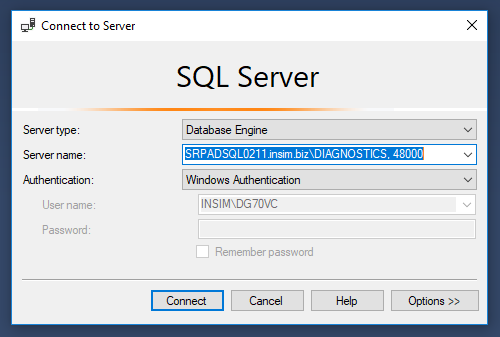 <br>
In `python` this is done connecting the engine using `pyodbc`. 

## Read SQL table

In [11]:
# query with no options

# measure time
t1_start = time.perf_counter()
t2_start = time.process_time()

cnxn        = pyodbc.connect(r'Driver={SQL Server};SERVER=SRPADSQL0211.insim.biz\DIAGNOSTICS,48000;Database=QEDB;Trusted_Connection=yes')
sql_query   = "SELECT DISTINCT RiskEndDate from Qedb.[ex].[AI_RiskResidualMonthly] ORDER BY RiskEndDate"
MonthDates  = pd.read_sql(sql_query, cnxn)
cnxn.close()
print(MonthDates.head(1))

t1_stop = time.perf_counter()
t2_stop = time.process_time()
print("--------------------------------------------------")
print("Elapsed time: %.1f [sec]"     % ((t1_stop - t1_start)))
print("CPU process time: %.1f [sec]" % ((t2_stop - t2_start)))
print("--------------------------------------------------") 

   RiskEndDate
0     19900228
--------------------------------------------------
Elapsed time: 0.6 [sec]
CPU process time: 0.0 [sec]
--------------------------------------------------


In [9]:
# query with options: 
StartDate  = 20190101
EndDate    = 20190201
UniverseID = 20007
cnxn      = pyodbc.connect(r'Driver={SQL Server};SERVER=SRPADSQL0211.insim.biz\DIAGNOSTICS,48000;Database=QEDB;Trusted_Connection=yes')
sql       = f"EXEC [prv].[GetStockReturns] @StartDate={StartDate}, @EndDate={EndDate}, @Currency='EUR', @UniverseID={UniverseID};"
df_stocks = pd.read_sql(sql, cnxn)
cnxn.close()    
print(df_stocks.head())

Empty DataFrame
Columns: [StartDate, EndDate, InfoCode, InstrumentName, ReturnCurrency, TotalReturn, MarketCapEUR, PITUniverseFlag, GICS1, MixedSector, GICS2, GICS3, RiskCountry]
Index: []


## Write SQL table

The code below write the table one by one to the SQL DB (**not** very efficient).

In [ ]:
# open connection
cnxn = pyodbc.connect(r'Driver={SQL Server};SERVER=SRPADSQL0211.insim.biz\DIAGNOSTICS,48000;Database=QEDB;Trusted_Connection=yes')
# Create a cursor from the connection
cursor = cnxn.cursor()

for index, entry in BayesTargetDB.iterrows() :
    # INSERT entry:  
    RiskModelName  = entry["RiskModelName"]
    EndDate        = entry["EndDate"]
    Item_          = entry["Item_"] 
    TargetExposure = entry["TargetExposure"]
    TargetWeight   = entry["TargetWeight"] 
    cursor.execute("INSERT INTO Qedb.[ex].[AI_BayesianTargets] (RiskModelName, EndDate, Item_, TargetExposure, TargetWeight) values (?, ?, ?, ?, ?)", 
                                                                RiskModelName, EndDate, Item_, TargetExposure, TargetWeight)
    cnxn.commit()

# close connection
cnxn.close() 

Whenever possible use the `bulkupload` package to upload the table in bulk. 
Installation can be simply done via `pip install --user bulkupload-1.0.4.tar.gz`;

In [ ]:
import bulkupload
# NB: keep the same column order of the database, e.g.:
df = df[['col1', 'col2', 'col3']] 
# my_df is a pandas dataframe with attributes consistent w.r.t the SQL table
df.to_sql_bulk(table     = 'TABLENAME', 
               schema    = 'ex', 
               database  = 'QEDB', 
               driver    = 'SQL Server', 
               server    = 'SRPADSQL0211.insim.biz\DIAGNOSTICS,48000',
               if_exists = 'append')

## Delete SQL table with conditions

In [ ]:
# open connection
cnxn = pyodbc.connect(r'Driver={SQL Server};SERVER=SRPADSQL0211.insim.biz\DIAGNOSTICS,48000;Database=QEDB;Trusted_Connection=yes')
# Create a cursor from the connection
cursor = cnxn.cursor()
# delete entry using parametrization
EndDate = 20180831
cursor.execute('DELETE FROM Qedb.[ex].[AI_BayesianTargets] WHERE EndDate=?', (EndDate))
cnxn.commit()
cnxn.close() # close connection 